<a href="https://colab.research.google.com/github/Ameya-31/Clustering-datasets/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()


In [ ]:
import os

current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: /content


In [ ]:
data_2015=pd.read_csv("./sample_data/2015.csv")
data_2016=pd.read_csv("./sample_data/2016.csv")
data_2017=pd.read_csv("./sample_data/2017.csv")
data=pd.concat([data_2015,data_2016,data_2017])

In [ ]:
data.head()

,user_id,start_time,end_time,stime,utime,alps_exit,alps_nppn,alps_width,alps_resid,aprun_id,...,node_count,max_rss,rchar,wchar,gpu_mode,gpu_pids,gpu_secs,gpu_maxsecs,gpu_maxmem,gpu_summem
0,User118,2015-03-26 18:38:16.603929,2015-03-26 23:42:40.128085,1.598528e+10,3.137974e+10,0.0,1.0,16.0,25048.0,8231766.0,...,16.0,716264.0,307112186.0,3.880343e+09,exclusive_process,1.0,119053.0,119053.0,327417856.0,3.908043e+09
1,User118,2015-03-26 18:38:16.671431,2015-03-26 23:42:40.762990,1.612195e+10,3.125179e+10,0.0,1.0,16.0,25048.0,8231769.0,...,16.0,712680.0,305831125.0,3.867837e+09,exclusive_process,1.0,121800.0,121800.0,267386880.0,3.598189e+09
2,User118,2015-03-26 18:38:16.588309,2015-03-26 23:42:41.345902,1.593606e+10,2.715182e+10,0.0,1.0,16.0,25048.0,8231767.0,...,16.0,716696.0,313353166.0,3.867733e+09,exclusive_process,1.0,120157.0,120157.0,297795584.0,3.645112e+09
3,User235,2015-03-26 23:42:09.347839,2015-03-26 23:43:01.635625,2.291600e+07,4.845400e+08,0.0,1.0,10.0,25329.0,8232719.0,...,10.0,930680.0,822356066.0,2.210589e+08,exclusive_process,1.0,218.0,218.0,675545088.0,6.755451e+09
4,User118,2015-03-26 18:38:16.295185,2015-03-26 23:43:13.928797,1.603896e+10,2.327763e+10,0.0,1.0,16.0,25048.0,8231765.0,...,16.0,717600.0,309680572.0,3.867504e+09,exclusive_process,1.0,123302.0,123302.0,330301440.0,3.886809e+09


In [ ]:
missing_values = data.isna().sum()
columns_with_missing_values = missing_values[missing_values > 0].index
print("Columns with missing values:", columns_with_missing_values)

Columns with missing values: Index(['end_time', 'stime', 'utime', 'alps_exit', 'alps_nppn', 'alps_width',
       'alps_resid', 'aprun_id', 'command', 'node_count', 'max_rss', 'rchar',
       'wchar', 'gpu_mode', 'gpu_pids', 'gpu_secs', 'gpu_maxsecs',
       'gpu_maxmem', 'gpu_summem'],
      dtype='object')


In [ ]:
data_cleaned = data.dropna(how='any')
data_cleaned.reset_index(drop=True, inplace=True)
data_cleaned["duration"]=data_cleaned["utime"]-data_cleaned["stime"]
data_cleaned=data_cleaned[data_cleaned["alps_exit"]==0]
data_cleaned=data_cleaned[['alps_nppn', 'alps_width','node_count', 'max_rss', 'rchar', 'wchar','gpu_secs', 'gpu_summem','duration','command']]
X=data_cleaned.drop("command",axis=1)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

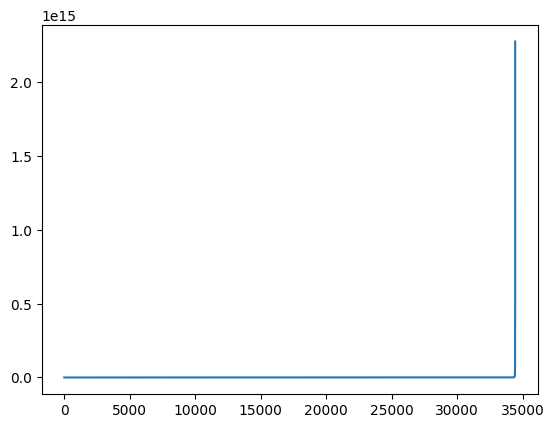

In [ ]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


[]

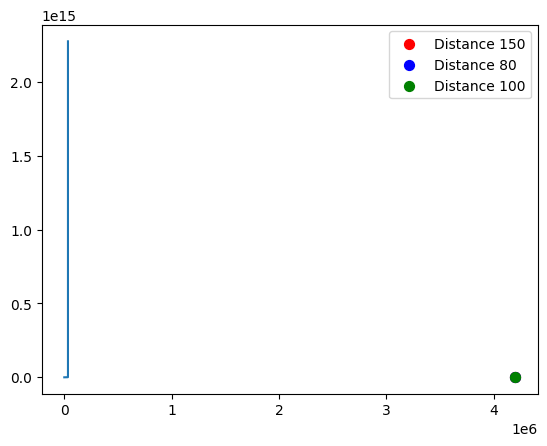

In [ ]:
plt.plot(distances)

plt.scatter(4.2e6, 150, color='red', s=50, label='Distance 150')
plt.scatter(4.2e6, 80, color='blue', s=50, label='Distance 80')
plt.scatter(4.2e6, 100, color='green', s=50, label='Distance 100')
plt.legend()
plt.plot()

In [ ]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [ ]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.describe())

                 P1            P2
count  3.442400e+04  3.442400e+04
mean   4.128182e-17 -1.506787e-17
std    6.734921e-01  5.033246e-01
min   -5.956813e-01 -8.193815e-01
25%   -5.198472e-01 -2.880071e-01
50%   -4.288509e-01 -2.693421e-01
75%    5.164897e-01  1.047999e-01
max    1.342244e+00  1.084520e+00


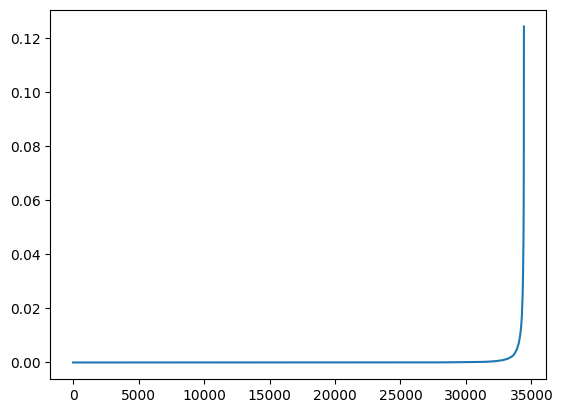

In [ ]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(X_principal)
distances, indices = neighbors_fit.kneighbors(X_principal)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


(26000.0, 40000.0)

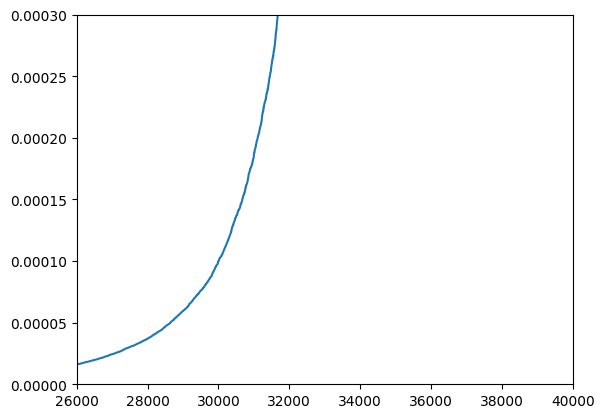

In [ ]:
plt.plot(distances)
plt.ylim(0,0.0003)
plt.xlim(26000,40000)


In [ ]:
db_default = DBSCAN(eps = 0.0008, min_samples = 20).fit(X_principal)
labels = db_default.labels_

In [ ]:
np.unique(labels)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111])

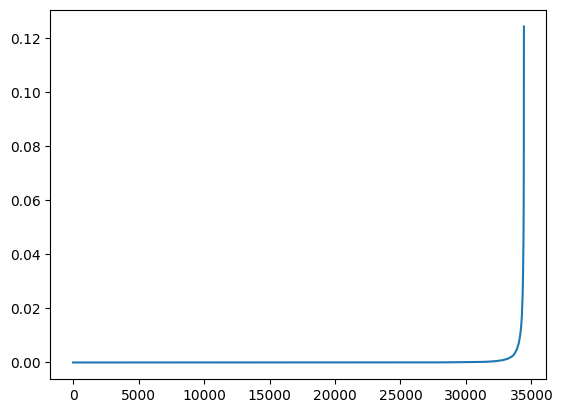

In [ ]:
neighbors = NearestNeighbors(n_neighbors=100)
neighbors_fit = neighbors.fit(X_principal)
distances_1, indices = neighbors_fit.kneighbors(X_principal)
distances_1 = np.sort(distances_1, axis=0)
distances_1 = distances_1[:,1]
plt.plot(distances_1)


(26000.0, 40000.0)

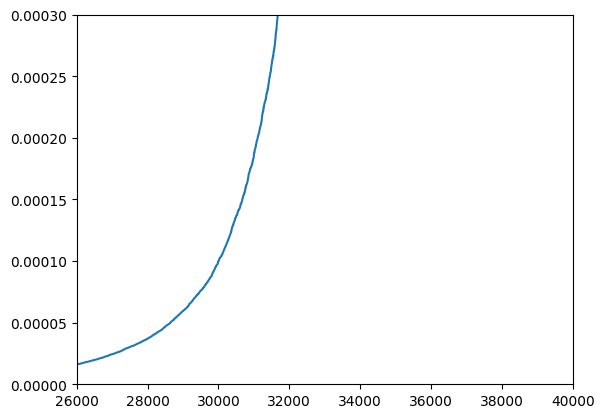

In [ ]:
plt.plot(distances_1)
plt.ylim(0,0.0003)
plt.xlim(26000,40000)

In [ ]:
db_default = DBSCAN(eps = 0.0008, min_samples = 20).fit(X_principal)
labels = db_default.labels_


In [ ]:
labels=labels+1
a=pd.DataFrame(np.bincount(np.array(labels)))
a

,0
0,7303
1,41
2,53
3,9461
4,233
...,...
108,29
109,20
110,61
111,20


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(a, *[0], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(a, *[0], **{})
chart

In [ ]:
db_default = DBSCAN(eps = 0.0008, min_samples = 100).fit(X_principal)
labels = db_default.labels_


In [ ]:
labels=labels+1
a=pd.DataFrame(np.bincount(np.array(labels)))
a

,0
0,11460
1,8321
2,186
3,234
4,330
5,186
6,584
7,512
8,137
9,284


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(a, *[0], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(a, *[0], **{})
chart

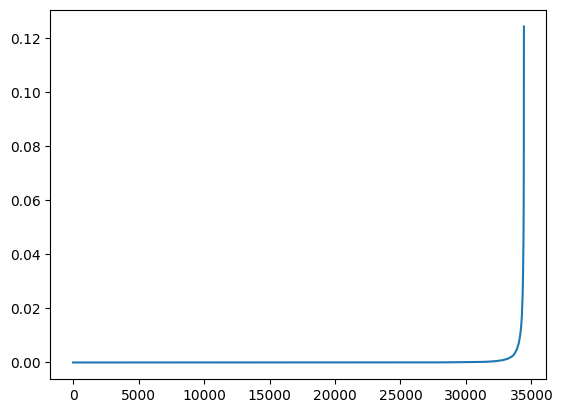

In [ ]:
neighbors = NearestNeighbors(n_neighbors=500)
neighbors_fit = neighbors.fit(X_principal)
distances, indices = neighbors_fit.kneighbors(X_principal)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

(0.0, 0.02)

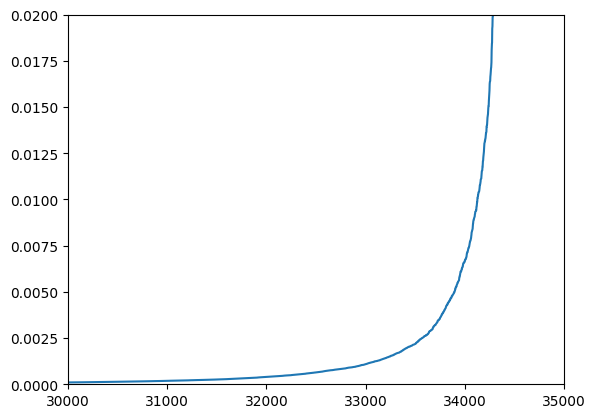

In [ ]:
plt.plot(distances)
plt.xlim(30000,35000)
plt.ylim(0,0.020)

In [ ]:
db_default = DBSCAN(eps = 0.028, min_samples = 500).fit(X_principal)
labels_2= db_default.labels_


In [ ]:
labels_2=labels_2+1
a=pd.DataFrame(np.bincount(np.array(labels)))
a

,0
0,11460
1,8321
2,186
3,234
4,330
5,186
6,584
7,512
8,137
9,284


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(a, *[0], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(a, *[0], **{})
chart

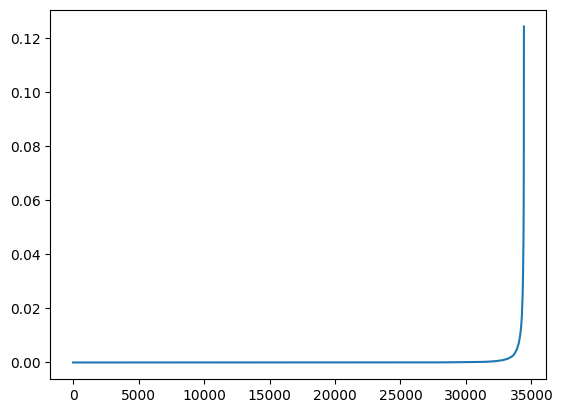

In [ ]:
neighbors = NearestNeighbors(n_neighbors=1000)
neighbors_fit = neighbors.fit(X_principal)
distances_2, indices = neighbors_fit.kneighbors(X_principal)
distances_2 = np.sort(distances_2, axis=0)
distances_2 = distances_2[:,1]
plt.plot(distances_2)

(0.0, 0.0075)

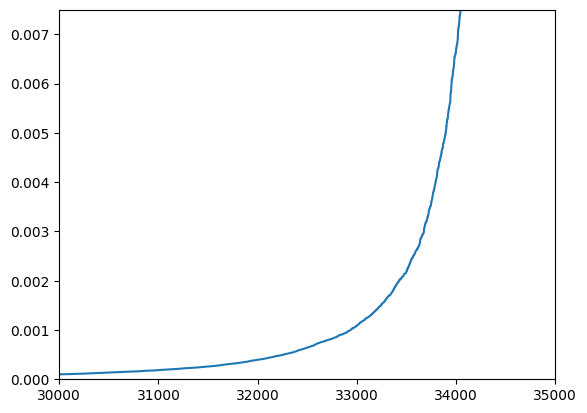

In [ ]:
plt.plot(distances_2)
plt.xlim(30000,35000)
plt.ylim(0,0.0075)

In [ ]:
db_default = DBSCAN(eps = 0.02, min_samples = 1000).fit(X_principal)
labels_2= db_default.labels_

In [ ]:
labels_2=labels_2+1
a=pd.DataFrame(np.bincount(np.array(labels)))
a

,0
0,11460
1,8321
2,186
3,234
4,330
5,186
6,584
7,512
8,137
9,284


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(a, *[0], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(a, *[0], **{})
chart